<a href="https://colab.research.google.com/github/rsgis2025ansif-ui/python-basics/blob/main/notebooks/05_Capstone_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Full Capstone Assignment — Python for Earth System & Remote Sensing**

This Capstone Assignment integrates all major skills from Notebooks **01 → 04**:

- Python fundamentals  
- Lists, loops, conditions  
- Functions & plotting  
- NumPy  
- xarray  
- NetCDF  
- Scientific interpretation  

**This assignment is designed to be completed over multiple days** and tests understanding, reasoning, coding clarity, and scientific interpretation.


---
# **Section 0 — Setup (Required)**

Run the cell below to import the scientific Python libraries you need for the assignment.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
%matplotlib inline

---
# **Section 1 — Python Fundamentals (Notebook 01)**

### **Q1.1 — Arithmetic & Variables**  
Create:
- `a = 12`
- `b = 4.7`
- `c = -3`

Compute and print:
1. `a + b`
2. `a * c`
3. `(a + b) / c`

Use f-strings to print meaningful messages.


In [2]:
# Q1.1
a = 12
b = 4.7
c = -3

print(f"a + b = {a+b}")
print(f"a * c = {a*c}")
print(f"(a + b) / c = {(a+b)/c}")


a + b = 16.7
a * c = -36
(a + b) / c = -5.566666666666666


### **Q1.2 — Basic Statistics**  
Given:
```python
sst = [27.9, 28.0, 28.4, 28.6, 28.8, 29.1, 28.7, 28.3, 27.8]
```

Compute:
- Mean  
- Median  
- Minimum  
- Maximum  
- Standard deviation  

Print with clear labels.


In [3]:
# Q1.2
import numpy as np
sst = [27.9,28.0,28.4,28.6,28.8,29.1,28.7,28.3,27.8]
print("sum:",sum(sst) )
print("mean:",np.mean(sst))
print("median:",np.median(sst))
print("min:",np.min(sst))
print("max:",np.max(sst))
print("std:",np.std(sst))



sum: 255.6
mean: 28.400000000000002
median: 28.4
min: 27.8
max: 29.1
std: 0.416333199893227


---
# **Section 2 — Lists, Loops, and Conditions (Notebook 02)**

### **Q2.1 — Day-wise SST Printing**  
Using the `sst` list from Q1.2, print:

```
Day 1: value
Day 2: value
...
```


In [4]:
from tempfile import tempdir
# Q2.1
sst = [27.9,28.0,28.4,28.6,28.8,29.1,28.7,28.3,27.8]
for i in range(len(sst)):
  temp = sst[i]
  print(f"Day {i+1}: {temp}")


Day 1: 27.9
Day 2: 28.0
Day 3: 28.4
Day 4: 28.6
Day 5: 28.8
Day 6: 29.1
Day 7: 28.7
Day 8: 28.3
Day 9: 27.8


### **Q2.2 — Classification**  
Classify each SST into:
- **HOT** (> 29)  
- **WARM** (28–29)  
- **NORMAL** (< 28)

Print classification for each day.  
At the end, print counts for each category.


In [5]:
# Q2.2
sst = [27.9,28.0,28.4,28.6,28.8,29.1,28.7,28.3,27.8]
hot_sst = []
warm_sst = []
normal_sst = []

for i in range(len(sst)):
  temp = sst[i]
  if temp > 29:
    hot_sst.append(temp)
  if temp < 28:
    warm_sst.append(temp)
  if temp >= 28 and temp <= 29:
    normal_sst.append(temp)

print("hot =", hot_sst)
print("warm =", warm_sst)
print("normal =", normal_sst)

hot = [29.1]
warm = [27.9, 27.8]
normal = [28.0, 28.4, 28.6, 28.8, 28.7, 28.3]


### **Q2.3 — Rolling 3-day Mean**  
Compute a 3-day rolling mean using loops (without NumPy).  
Example output:
```
Mean Day1-3: ...
Mean Day2-4: ...
...
```


In [6]:
# Q2.3
sst = [27.9,28.0,28.4,28.6,28.8,29.1,28.7,28.3,27.8]
for i in range(len(sst)-2):
  temp = (sst[i] + sst[i+1] + sst[i+2])/3
  print(f"Mean Day{i+1}-{i+3}: {temp}")

Mean Day1-3: 28.099999999999998
Mean Day2-4: 28.333333333333332
Mean Day3-5: 28.599999999999998
Mean Day4-6: 28.833333333333332
Mean Day5-7: 28.86666666666667
Mean Day6-8: 28.7
Mean Day7-9: 28.266666666666666


---
# **Section 3 — Functions, Arrays, and Plotting (Notebook 03)**

### **Q3.1 — Function: Celsius → Kelvin**  
Define:
```python
def c_to_k(T_c):
    ...
```
Test on 5 sample values.


In [7]:
# Q3.1
def c_to_k(T_c):
  T_k = T_c + 273.15
  return T_k
print(c_to_k(29), "K")
print(c_to_k(28), "K")
print(c_to_k(27), "K")
print(c_to_k(26), "K")
print(c_to_k(25), "K")

302.15 K
301.15 K
300.15 K
299.15 K
298.15 K


### **Q3.2 — Function: Anomaly Computation**  
Define:
```python
def compute_anomaly(arr):
    ...
```
Return array − mean.  
Test using `sst`.


In [8]:
# Q3.2
import numpy as np
sst = [27.9,28.0,28.4,28.6,28.8,29.1,28.7,28.3,27.8]
def compute_anomaly(arr):
  mean = np.mean(arr)
  anomaly = arr - mean
  return anomaly
print(compute_anomaly(sst))


[-5.00000000e-01 -4.00000000e-01 -3.55271368e-15  2.00000000e-01
  4.00000000e-01  7.00000000e-01  3.00000000e-01 -1.00000000e-01
 -6.00000000e-01]


### **Q3.3 — Convert to NumPy + Plot**  

1. Convert `sst` to a NumPy array  
2. Compute anomalies  
3. Create a line plot of SST  
4. Create a second plot of anomalies  
5. Include:
   - Titles  
   - Axis labels  
   - Grid  
   - A horizontal zero line for anomalies  


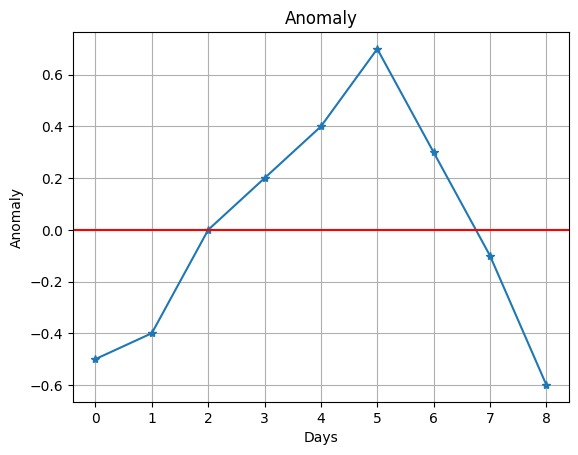

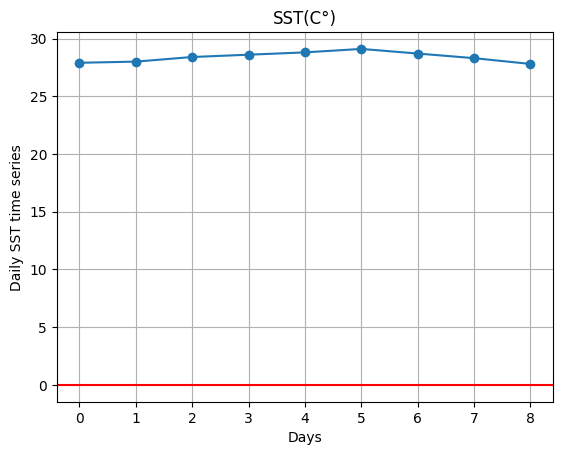

In [9]:
# Q3.3
import matplotlib.pyplot as plt
import numpy as np
sst = [27.9,28.0,28.4,28.6,28.8,29.1,28.7,28.3,27.8]

def compute_anomaly(arr):
  mean = np.mean(arr)
  anomaly = arr - mean
  return anomaly

anomaly = compute_anomaly(sst)

days = np.arange(0,9)
plt.figure()
plt.plot(days, anomaly, marker = '*')
plt.title("Anomaly")
plt.xlabel("Days")
plt.ylabel("Anomaly")
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

#print(compute_anomaly(sst))

plt.figure()
plt.plot(days, sst, marker = 'o')
plt.title("SST(C°)")
plt.xlabel("Days")
plt.ylabel("Daily SST time series")
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


---
# **Section 4 — NetCDF + xarray: Remote Sensing Dataset (Notebook 04)**

A small SST NetCDF file will be downloaded automatically.



In [10]:
# Auto-download NetCDF file
import requests, os
import xarray as xr


url = "https://raw.githubusercontent.com/EarthSystem-Science-Lab/python-basics/main/data/data_sst.nc"
local = "data_sst.nc"

if not os.path.exists(local):
    r = requests.get(url)
    open(local,"wb").write(r.content)

ds = xr.open_dataset(local)
ds

<xarray.Dataset> Size: 7kB
Dimensions:  (time: 7, lat: 11, lon: 11)
Coordinates:
  * time     (time) datetime64[ns] 56B 2020-01-01 2020-01-02 ... 2020-01-07
  * lat      (lat) float64 88B 10.0 11.0 12.0 13.0 14.0 ... 17.0 18.0 19.0 20.0
  * lon      (lon) float64 88B 70.0 71.0 72.0 73.0 74.0 ... 77.0 78.0 79.0 80.0
Data variables:
    sst      (time, lat, lon) float64 7kB ...
Attributes:
    title:    Sample synthetic SST dataset for teaching
    source:   Generated in Python for teaching by Arjun's EarthSystem-Science...
    history:  Created as a small example NetCDF file for Notebook 4

### **Q4.1 — Dataset Exploration**  
Print:
- Dimensions  
- Coordinates  
- Variables  
- Global attributes  


In [11]:
# Q4.1
var = ds.sst
print(ds.dims)
print(ds.coords)
print(ds.variables)
print(ds.attrs)


FrozenMappingWarningOnValuesAccess({'time': 7, 'lat': 11, 'lon': 11})
Coordinates:
  * time     (time) datetime64[ns] 56B 2020-01-01 2020-01-02 ... 2020-01-07
  * lat      (lat) float64 88B 10.0 11.0 12.0 13.0 14.0 ... 17.0 18.0 19.0 20.0
  * lon      (lon) float64 88B 70.0 71.0 72.0 73.0 74.0 ... 77.0 78.0 79.0 80.0
Frozen({'sst': <xarray.Variable (time: 7, lat: 11, lon: 11)> Size: 7kB
[847 values with dtype=float64]
Attributes:
    long_name:  Sea Surface Temperature
    units:      degree_Celsius, 'lat': <xarray.IndexVariable 'lat' (lat: 11)> Size: 88B
array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20.])
Attributes:
    units:    degrees_north, 'lon': <xarray.IndexVariable 'lon' (lon: 11)> Size: 88B
array([70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80.])
Attributes:
    units:    degrees_east, 'time': <xarray.IndexVariable 'time' (time: 7)> Size: 56B
array(['2020-01-01T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
       '2020-01-03T00:00:00.000000000', '202

### **Q4.2 — Statistics on `sst`**  
Compute and print:
- Global mean  
- Min  
- Max  


In [12]:
# Q4.2
import numpy as np

sst = (27.9,28.0,28.4,28.6,28.8,29.1,28.7,28.3,27.8)

mean_sst = np.mean(sst)
min_sst = np.min(sst)
max_sst = np.max(sst)
print("Global mean:", mean_sst)
print("Min:", min_sst)
print("Max:", max_sst)

Global mean: 28.400000000000002
Min: 27.8
Max: 29.1


### **Q4.3 — Time-Mean Map**  
1. Compute `sst_mean_time = ds.sst.mean(dim='time')`  
2. Plot a colour map (lat vs lon)  
3. Add labels, title, and colorbar  



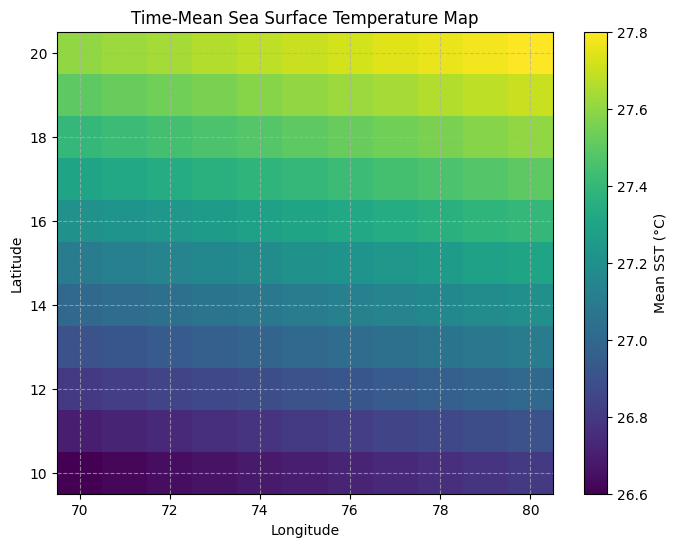

In [13]:
# Q4.3

sst_mean_time = ds.sst.mean(dim='time')

plt.figure(figsize=(8, 6))
sst_mean_time.plot(cmap='viridis', cbar_kwargs={'label': 'Mean SST (°C)'})
plt.title('Time-Mean Sea Surface Temperature Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### **Q4.4 — Time Series at a Point**  
Choose a latitude & longitude inside file domain.  
Extract nearest time series and plot it.

Add axis labels and title.


NameError: name 'plot' is not defined

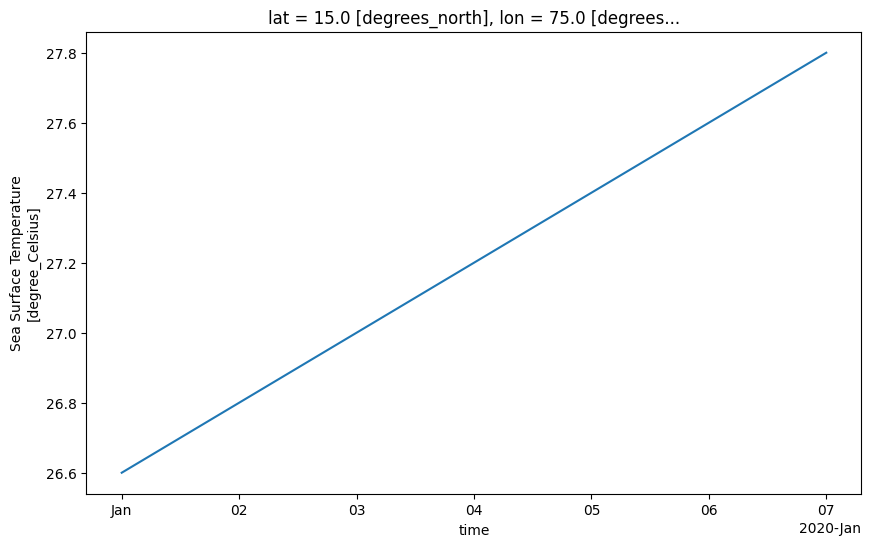

In [21]:
# Q4.4
import numpy as np
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/EarthSystem-Science-Lab/python-basics/main/data/data_sst.nc"
local = "data_sst.nc"

ds= xr.open_dataset("data_sst.nc")

lat_pt = 15
lon_pt = 75

ts = ds.sst.sel(lat=lat_pt, lon=lon_pt, method='nearest')

plt.figure(figsize=(10, 6))
ts.plot()


plot.title(f"Time Series at ({lat_pt},{lon_pt},)")
plt.xlabel('Time')
plt.ylabel('SST (°C)')
plt.grid(True)
plt.show()




---
# **Section 5 — Capstone Scientific Interpretation**  

Write **10–12 sentences** answering:

1. What spatial patterns do you observe in your time-mean SST map?  
2. Does the time series at your chosen point indicate warming/cooling or variability?  
3. What physical processes (mixing, stratification, insolation, currents, monsoon) could explain the patterns?  
4. How do your anomaly results relate to the NetCDF dataset behavior?  
5. How would these methods apply to real satellite (Sentinel-3/OLCI) or Argo data?

Write your answer below.


*Write your full scientific interpretation here.*